# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [96]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [97]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [98]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [99]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [100]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
if results.left_hand_landmarks:
    print(len(results.left_hand_landmarks.landmark))
else:
    print("Left hand not detected.")

21


In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

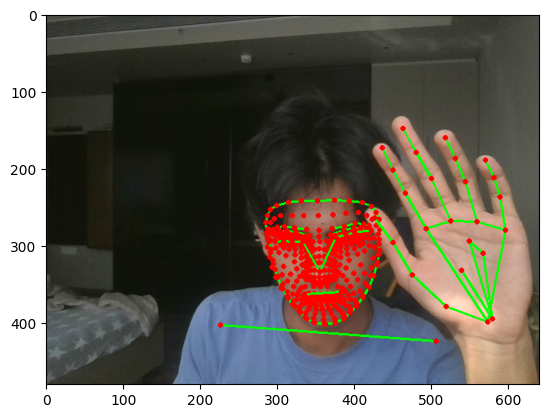

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [101]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [102]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [103]:
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks
    else np.zeros(1404)
)


In [104]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [105]:
result_test = extract_keypoints(results)

In [106]:
result_test

array([ 0.42387667,  0.64707226, -1.05461431, ...,  0.        ,
        0.        ,  0.        ])

In [107]:
468*3+33*4+21*3+21*3

1662

In [108]:
np.save('0', result_test)

In [109]:
np.load('0.npy')

array([ 0.42387667,  0.64707226, -1.05461431, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [37]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [38]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [39]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [184]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                 # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [40]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [110]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [111]:
label_map = {label:num for num, label in enumerate(actions)}

In [112]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [44]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [113]:
np.array(sequences).shape

(90, 30, 1662)

In [114]:
np.array(labels).shape

(90,)

In [115]:
X = np.array(sequences)

In [116]:
X.shape

(90, 30, 1662)

In [117]:
y = to_categorical(labels).astype(int)

In [118]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [120]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [149]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16209762614622066076
xla_global_id: -1
]


In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [151]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [152]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [153]:
res = [.7, 0.2, 0.1]

In [154]:
actions[np.argmax(res)]

'hello'

In [155]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [156]:
import tensorflow as tf
print("TF Version: ", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
print("GPUs available:", gpus)

TF Version:  2.11.0
GPUs available: []


In [157]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
3/3 [==============================] - 3s 69ms/step - loss: 1.7624 - categorical_accuracy: 0.2941
Epoch 2/100
3/3 [==============================] - 0s 73ms/step - loss: 2.0304 - categorical_accuracy: 0.4706
Epoch 3/100
3/3 [==============================] - 0s 90ms/step - loss: 9.1884 - categorical_accuracy: 0.2824
Epoch 4/100
3/3 [==============================] - 0s 82ms/step - loss: 12.0355 - categorical_accuracy: 0.3882
Epoch 5/100
3/3 [==============================] - 0s 72ms/step - loss: 36.6240 - categorical_accuracy: 0.3412
Epoch 6/100
3/3 [==============================] - 0s 70ms/step - loss: 8.6327 - categorical_accuracy: 0.3529
Epoch 7/100
3/3 [==============================] - 0s 72ms/step - loss: 9.4380 - categorical_accuracy: 0.2118
Epoch 8/100
3/3 [==============================] - 0s 71ms/step - loss: 6.7489 - categorical_accuracy: 0.3529
Epoch 9/100
3/3 [==============================] - 0s 78ms/step - loss: 13.6138 - categorical_accuracy: 0.1412
Epoch 1

In [159]:
history = model.fit(
    X_train, y_train,
    epochs=200,                  # Train until 200 epochs
    initial_epoch=100,           # Start from epoch 100
    callbacks=[tb_callback]       # Optional: Save checkpoints
)

Epoch 101/200
3/3 [==============================] - 1s 119ms/step - loss: 1.0081 - categorical_accuracy: 0.4941
Epoch 102/200
3/3 [==============================] - 0s 79ms/step - loss: 1.0097 - categorical_accuracy: 0.4706
Epoch 103/200
3/3 [==============================] - 0s 127ms/step - loss: 1.0070 - categorical_accuracy: 0.5176
Epoch 104/200
3/3 [==============================] - 0s 154ms/step - loss: 1.0078 - categorical_accuracy: 0.5059
Epoch 105/200
3/3 [==============================] - 0s 83ms/step - loss: 1.0108 - categorical_accuracy: 0.4941
Epoch 106/200
3/3 [==============================] - 0s 78ms/step - loss: 1.0047 - categorical_accuracy: 0.4824
Epoch 107/200
3/3 [==============================] - 0s 74ms/step - loss: 1.0274 - categorical_accuracy: 0.4706
Epoch 108/200
3/3 [==============================] - 0s 75ms/step - loss: 0.9996 - categorical_accuracy: 0.4588
Epoch 109/200
3/3 [==============================] - 0s 74ms/step - loss: 1.0131 - categorical_accura

In [160]:
history1 = model.fit(
    X_train, y_train,
    epochs=350,                  # Train until 200 epochs
    initial_epoch=200,           # Start from epoch 100
    callbacks=[tb_callback]       # Optional: Save checkpoints
)

Epoch 201/350
3/3 [==============================] - 0s 68ms/step - loss: 0.9014 - categorical_accuracy: 0.5412
Epoch 202/350
3/3 [==============================] - 0s 72ms/step - loss: 0.9002 - categorical_accuracy: 0.4824
Epoch 203/350
3/3 [==============================] - 0s 84ms/step - loss: 0.8823 - categorical_accuracy: 0.4941
Epoch 204/350
3/3 [==============================] - 0s 73ms/step - loss: 0.8940 - categorical_accuracy: 0.5059
Epoch 205/350
3/3 [==============================] - 0s 68ms/step - loss: 0.9116 - categorical_accuracy: 0.4941
Epoch 206/350
3/3 [==============================] - 0s 70ms/step - loss: 0.8900 - categorical_accuracy: 0.5765
Epoch 207/350
3/3 [==============================] - 0s 72ms/step - loss: 0.8982 - categorical_accuracy: 0.4824
Epoch 208/350
3/3 [==============================] - 0s 72ms/step - loss: 0.9106 - categorical_accuracy: 0.4118
Epoch 209/350
3/3 [==============================] - 0s 72ms/step - loss: 0.8872 - categorical_accuracy:

In [163]:
model.save("action350.h5")

In [164]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [165]:
res = model.predict(X_test)

1/1 [==============================] - 0s 435ms/step


In [166]:
actions[np.argmax(res[4])]

'thanks'

In [167]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [87]:
model.save('action100.h5')

In [88]:
model.load_weights('action100.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [168]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [169]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 43ms/step


In [170]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [171]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [172]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [142]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

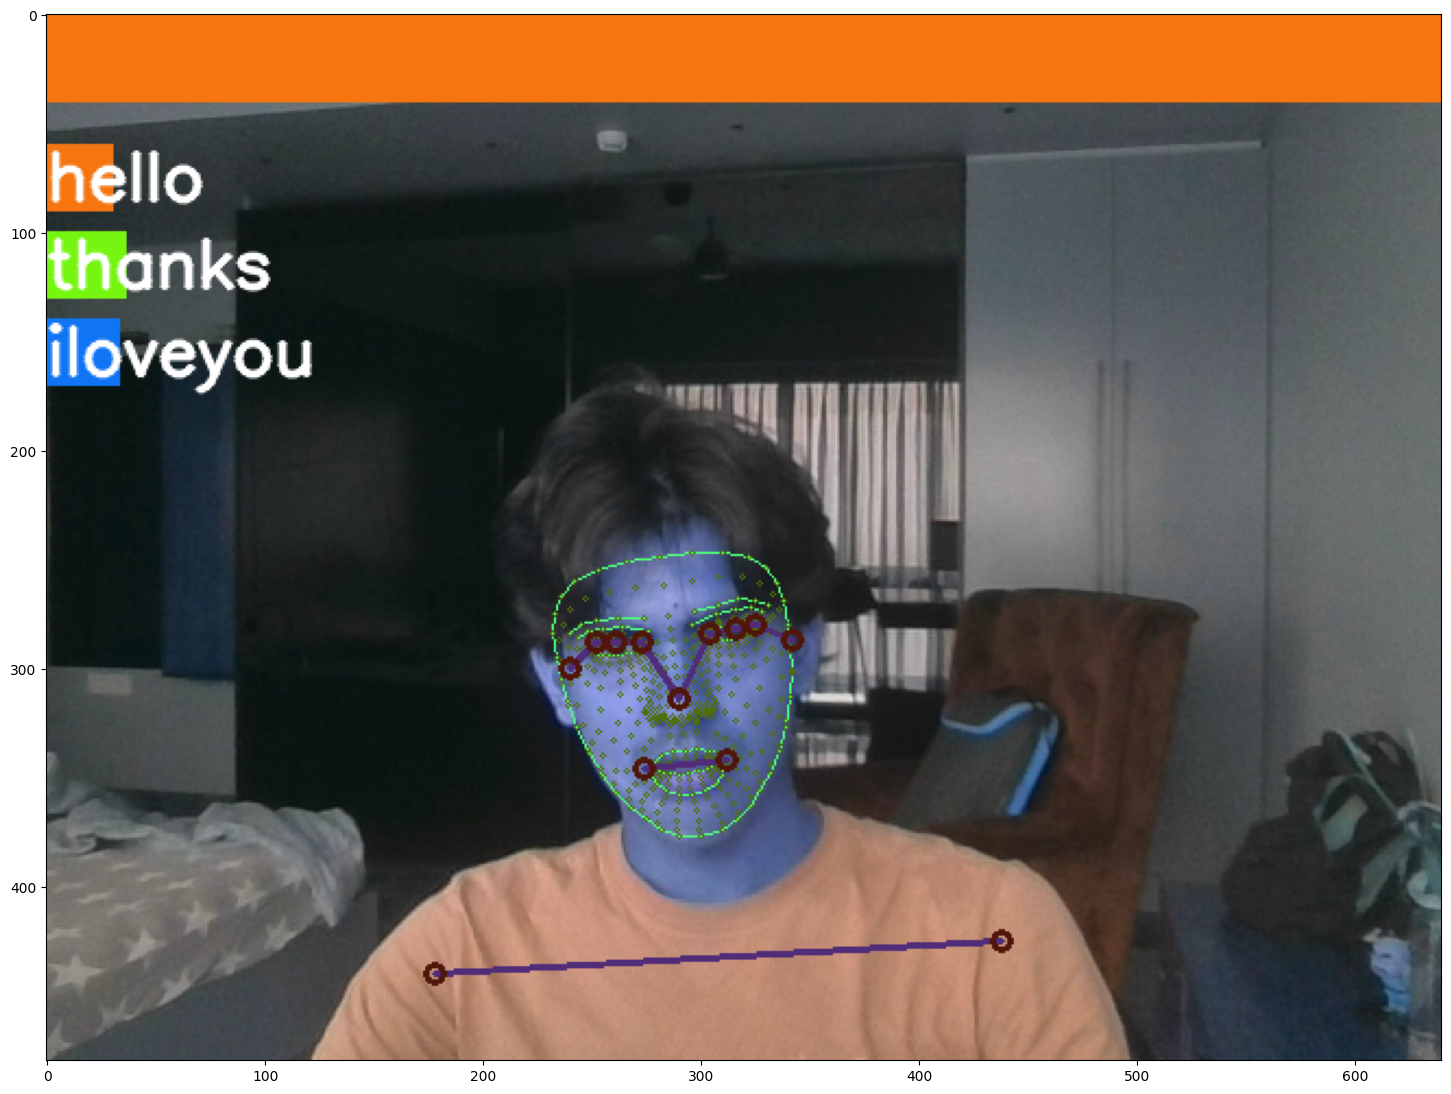

In [143]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [173]:
sequence.reverse()

In [174]:
len(sequence)

30

In [182]:
print(sequence.reverse())

None


In [176]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

In [177]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 34ms/step


array([[1.7069891e-04, 9.8295629e-01, 1.6872920e-02]], dtype=float32)

In [183]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [74]:
cap.release()
cv2.destroyAllWindows()

In [75]:
res[np.argmax(res)] > threshold

IndexError: index 7 is out of bounds for axis 0 with size 5

In [76]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [77]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 40ms/step


array([[0.3266147 , 0.34119225, 0.33219305]], dtype=float32)

In [82]:
import cv2
import numpy as np
import mediapipe as mp
from keras.models import load_model
import matplotlib.pyplot as plt
import mediapipe as mp
FACEMESH_TESSELATION = mp.solutions.face_mesh_connections.FACEMESH_TESSELATION

AttributeError: module 'mediapipe.python.solutions' has no attribute 'face_mesh_connections'